# Heart Disease Prediction

* __Description:__ This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
    this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.
* __Dataset:__ This dataset is taken from [https://www.kaggle.com/ronitf/heart-disease-uci]
* __Objective:__ To get insights of data and predict whether the patient has heart disease or not.

Here we will be experimenting with 3 algorithms

1.KNeighborsClassifier<br>
2.DecisionTreeClassifier<br>
3.RandomForestClassifier<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The meaning of each feature is desribed below:
* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = yes, 1 = no)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(0, 14)

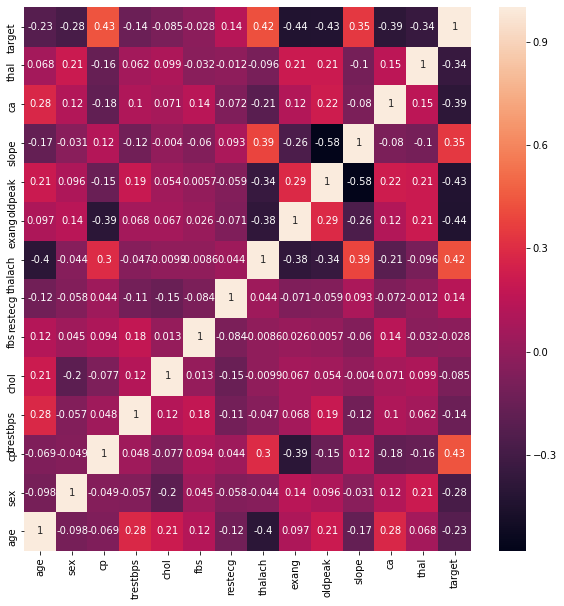

In [7]:
# plotting the correlation matrix
#code reffered from here https://stackoverflow.com/questions/39409866/correlation-heatmap
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot = True)
ax.set_ylim(0,14)

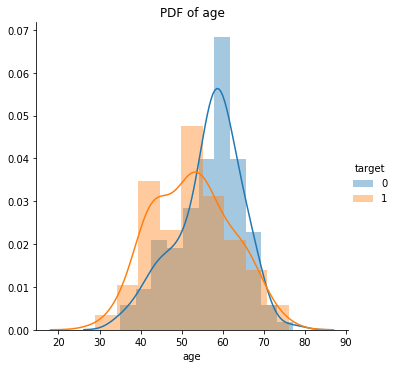

In [9]:
#analysis of age 
sns.FacetGrid(df, hue="target", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("PDF of age")
plt.show();

* As we can see, maximum people have heart disease in their 60's.<br>
Note: 0:have heart disease 1:no heart disease 

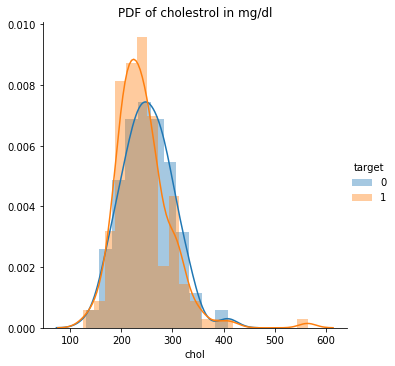

In [13]:
#analysis of cholestrol 
sns.FacetGrid(df, hue="target", height=5) \
   .map(sns.distplot, "chol") \
   .add_legend();
plt.title("PDF of cholestrol in mg/dl")
plt.show();

Cannot make any assumptions regarding heart disease with the help of cholestrol

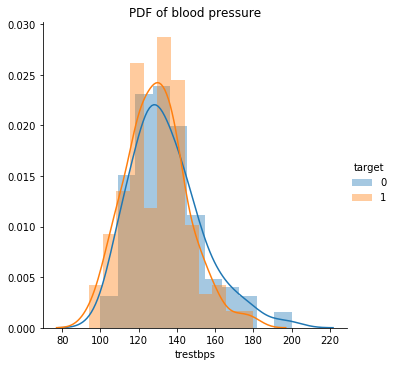

In [14]:
#analysis of blood pressure 
sns.FacetGrid(df, hue="target", height=5) \
   .map(sns.distplot, "trestbps") \
   .add_legend();
plt.title("PDF of blood pressure")
plt.show();

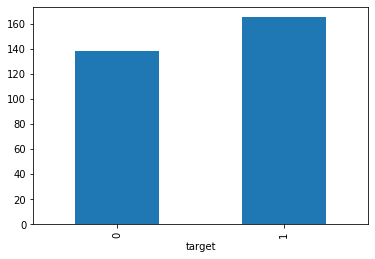

In [17]:
#checking the proportion of classes in target feature
df.groupby('target')['age'].count().plot.bar()

 As oberved above, some of the columns are categorical features, Let's convert them into dummy variables

In [18]:
#converting categorical features into dummy features
df_1 = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [19]:
df_1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


Scale of a numerical feature may dominate to other feature. Therefore Standardizing the numerical features

In [20]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_1[columns] = standardScaler.fit_transform(df_1[columns])
df_1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [22]:
#splitting data into train test
from sklearn.model_selection import train_test_split

y = df_1['target']
X = df_1.drop(['target'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=42)

In [23]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(203, 30) (203,)
(100, 30) (100,)


## Applying K-NN 

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


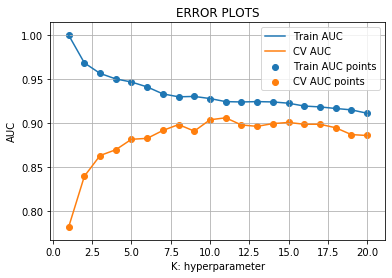

In [25]:
#performing cross validation to find right value for k
from sklearn.model_selection import GridSearchCV

k = [i for i in range(1,21)]
params = {'n_neighbors' : k}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params, cv = 5,scoring='roc_auc',return_train_score = True).fit(X_train,y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

results = results.sort_values(['param_n_neighbors'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_n_neighbors']

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [26]:
#Training with best k = 11 [observed from above plot] 
from sklearn.metrics import roc_curve, auc

neigh = KNeighborsClassifier(n_neighbors = 11).fit(X_train,y_train)
y_pred = neigh.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
knn_acc = auc(fpr,tpr)
print("Auc Score using KNN:",knn_acc)

Auc Score using KNN: 0.8563218390804599


## Applying decision tree

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(0, 4)

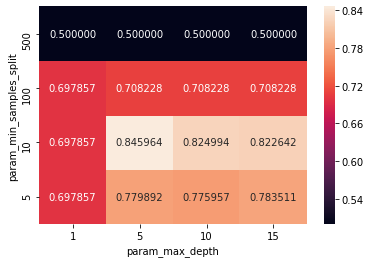

In [28]:
# for hyperparamter tuning we are considering 2 parameters max_depth = [1,5,10,15],min_samples_split = [5,10,100,500]

dt = DecisionTreeClassifier()
params = {'max_depth':[1,5,10,15],'min_samples_split':[5,10,100,500]}
clf_1 = GridSearchCV(dt, params, cv = 5,scoring='roc_auc',return_train_score = True).fit(X_train,y_train)

results = pd.DataFrame.from_dict(clf_1.cv_results_)
results = results.sort_values(['param_max_depth','param_min_samples_split'])
results1 = results.pivot('param_min_samples_split','param_max_depth','mean_test_score')
ax = sns.heatmap(results1,annot = True,fmt = 'f')
ax.set_ylim(0,4)

In [35]:
#best auc_score was found for max_depth = 5,min_samples_split = 10
#Training decision tree with best paramters
from sklearn import tree
dec_tree = DecisionTreeClassifier(max_depth = 5,min_samples_split = 10).fit(X_train,y_train)

#the decision tree
#tree.plot_tree(dec_tree)

y_pred1 = dec_tree.predict(X_test)
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred1)
dt_acc = auc(fpr_1,tpr_1)
print("Auc Score using Decision tree:",dt_acc)

Auc Score using Decision tree: 0.735632183908046


## Applying Random Forest

(0, 4)

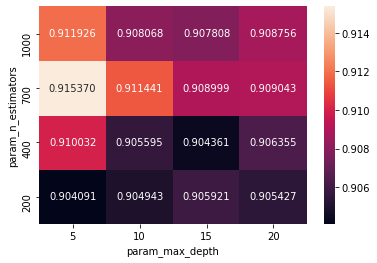

In [38]:
rf = RandomForestClassifier()
params = {'max_depth':[5,10,15,20],'n_estimators':[200,400,700,1000]}

clf_2 = GridSearchCV(rf, params, cv = 5,scoring='roc_auc',return_train_score = True).fit(X_train,y_train)

results = pd.DataFrame.from_dict(clf_2.cv_results_)
results = results.sort_values(['param_max_depth','param_n_estimators'])
results1 = results.pivot('param_n_estimators','param_max_depth','mean_test_score')
ax = sns.heatmap(results1,annot = True,fmt = 'f')
ax.set_ylim(0,4)

In [39]:
forest = RandomForestClassifier(n_estimators = 700,max_depth = 5).fit(X_train,y_train)
y_pred2 = forest.predict(X_test)

y_pred2 = forest.predict(X_test)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred2)
rf_acc = auc(fpr_2,tpr_2)
print("Auc Score using Decision tree:",rf_acc)

Auc Score using Decision tree: 0.8530377668308703


## Conclusion:
* From the above observations it is observed that k-nn model (with k = 11) and random forest (with max_depth = 5 and n_estimators = 700) had almost same auc_score (0.8563218390804599 & 0.8530377668308703)